## Observations and Insights 


1. The bar graph showed the Drug Regimen Capomulin and Ramicane has the maximum mice number, and propriva has the smaller mice number from overall data. By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 123 female mice and 125 male mice.

2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

3. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.

4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional:Display the data associated with the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id



,0
0,g989


In [5]:
# Optional:Display the data associated with the duplicate mouse ID. 
all_duplicate_rows = Combined_data.loc[Combined_data["Mouse ID"] == "g989"]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Display the updated number of unique mice IDs..
mice_in_clean_df=clean_df["Mouse ID"].value_counts()
number_of_mice_in_cleandf=len(mice_in_clean_df)
number_of_mice_in_cleandf

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 


regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumour Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumour Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumour Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumour Volume (mm3)"]
regimen_std 

regimen_sem= clean_df.groupby('Drug Regimen').sem()["Tumour Volume (mm3)"]
regimen_sem

# Assemble the resulting series into a single summary dataframe.

summary_df_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_df_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation= clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

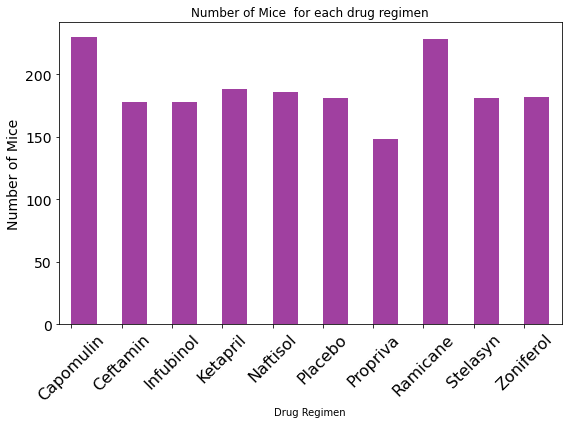

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_mice_per_tret = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"] 


plot_pandas =count_mice_per_tret.plot(kind="bar", color="purple", figsize=(8,6),alpha=0.75, align="edge",
                                   title="Number of Mice  for each drug regimen", fontsize=14)

plt.ylabel("Number of Mice",fontsize = 14)
plt.xticks(rotation="45",fontsize = 16)
plt.tight_layout()

plt.savefig("../Images/Number_Mice_for_each_drug_regimen_plotpandas.png", bbox_inches = "tight")
count_mice_per_tret
plt.show()

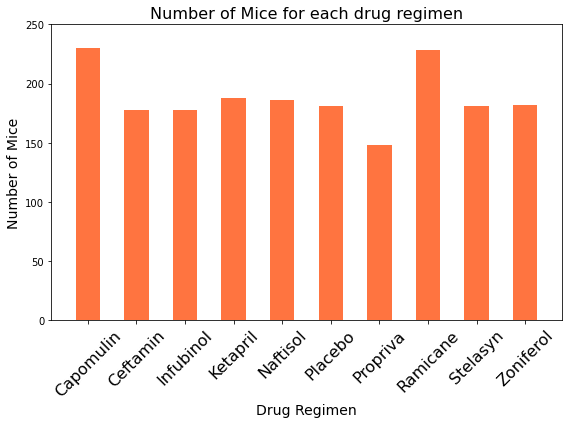

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


mice_list =(clean_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
mice_list
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.bar(x_axis, mice_list, color='orangered', alpha=0.75, align='center',width=0.5)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xticks(rotation="45",fontsize = 16)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+20)

plt.title("Number of Mice for each drug regimen",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.tight_layout()
plt.savefig("../Images/mat_mice_per_treat_pyplot.png", bbox_inches = "tight")


In [12]:
#  Group by gender and get the number to plot
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


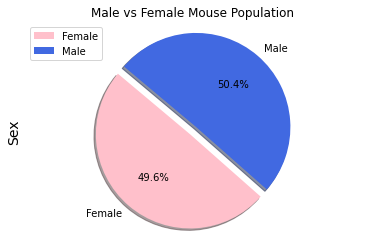

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colours = ['pink', 'royalblue']
explode = (0.1, 0)
pie_pandas = mouse_gender.plot(kind="pie", y='Total Count',  explode=explode, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140, title=("Male vs Female Mouse Population"))
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

plt.savefig("../Images/pie_plotpandas.png", bbox_inches = "tight")
plt.show()


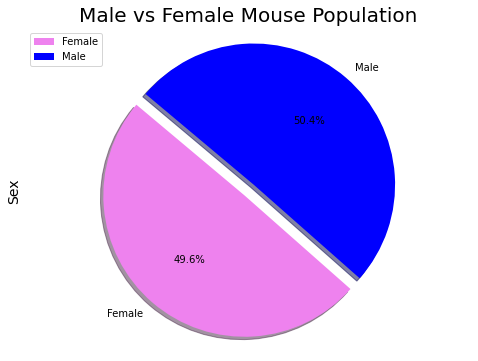

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.596774,50.403226]

#Set colors for each section of the pie
colours = ['violet', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

plt.legend(loc="best")

plt.savefig("../Images/pie_pyplot.png", bbox_inches = "tight")
plt.show()



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse

# Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
# Capomulin_vol = pd.DataFrame(Capomulin_last)

timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
# Capomulin_merge = pd.merge(Capomulin_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")
# Capomulin_merge.head()
vol_df = pd.merge(clean_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])
vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumour vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumour volumes
# add subset 
# Determine outliers using upper and lower bounds

for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumour Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    

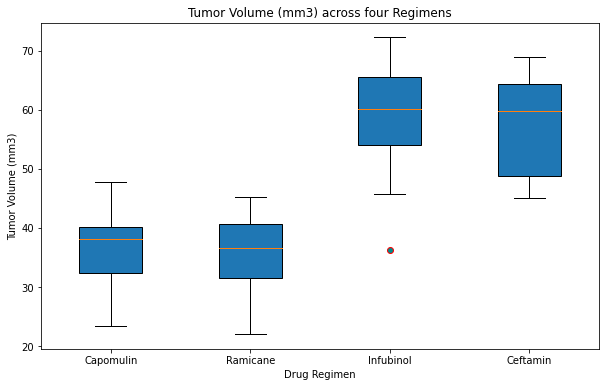

In [17]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="darkcyan",marker="o", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.boxplot(tumor_vol, flierprops=blue_dot,patch_artist=True,vert=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)
plt.savefig("../Images/box_plot.png", bbox_inches = "tight")
plt.show()

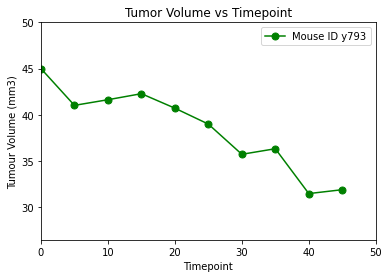

In [18]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
random_mouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
random_data = pd.merge(clean_df, random_mouse, on="Mouse ID", how="inner")
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)

time = random_df["Timepoint_x"]
vol = random_df["Tumour Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

#print(random_mouse["Mouse ID"])
line, = plt.plot(time, vol, 'green',markersize=7,marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

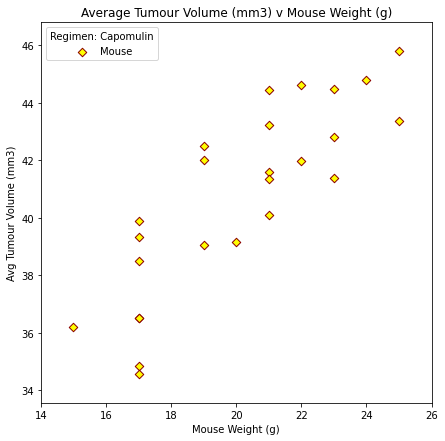

In [19]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumour Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumour Volume (mm3)":"Avg Tumour Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="D", facecolors="yellow", edgecolors="darkred")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumour Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumour Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [20]:
corr_coef = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {corr_coef}")

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84


y = 0.95x + 21.55


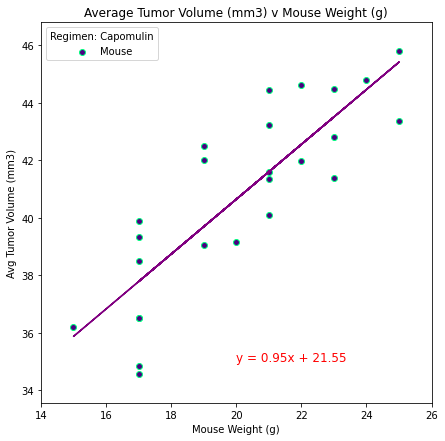

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
#linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(wt, vol)

#create equation of line
line = slope * wt + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(line_eq)

#plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="o", facecolors="indigo", edgecolors="springgreen")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")

plt.plot(wt, line, 'purple')
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.annotate(line_eq, (20,35), fontsize=12, color="r")
plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()